# 1 Read and clean police data

## 1.1 Data download

* inputdir is the folder where we put the police data downloaded from __[here](https://data.police.uk/data/)__. The data are organised into subfolder, one for each month. We have to read the monthly files and merge them into one single big file 
* policedata is the csv file where we save all the merged data
* the rural/urban classification for LSOA is downloaded from __[here](https://ons.maps.arcgis.com/home/item.html?id=7adcd11fff60422da067b3d4858a9de9)__. This is used to create the labels. Note that this data is not very up to date, with many missing lsoas. A better source could be __[here](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/lowersuperoutputareamidyearpopulationestimates)__

In [1]:
inputdir = 'C:/Users/Lanthao/Desktop/GAN/data'
policedata = '../data/south-wales-street.csv'
crosstable = '../data/south-wales-street_crosstable.csv'

## 1.2 Read and merge data

In [2]:
import pandas as pd
from glob import glob
import os

# List all subfolders in inputDir
dirs = glob(inputdir + "/*/")

df = pd.DataFrame()
for d in dirs: 
    for file in os.listdir(d):
       if file.endswith("south-wales-street.csv"):
            df_tmp = pd.read_csv(d + '/' + file)
            df = pd.concat([df,df_tmp], axis=0)
            #print('Reading... %s, df size=%d'%(file,len(df)))
df = df[['Month','Longitude','Latitude','Location','LSOA name','Crime type']]
print(df.shape)            

(406782, 6)


## 1.3 Clean off that NaN

In [3]:
df = df.dropna(subset = ['LSOA name', 'Month', 'Crime type'], axis=0)
df.sample(5)

,Month,Longitude,Latitude,Location,LSOA name,Crime type
8114,2016-09,-3.277156,51.562958,On or near Rhyd-Yr-Helyg,Rhondda Cynon Taf 026C,Anti-social behaviour
2964,2018-02,-3.174301,51.478673,On or near Parking Area,Cardiff 032G,Shoplifting
2901,2017-04,-3.176574,51.482498,On or near Shopping Area,Cardiff 032F,Shoplifting
5065,2017-03,-3.170632,51.464709,On or near Police Station,Cardiff 049B,Possession of weapons
842,2015-10,-3.567851,51.511073,On or near Glendower Close,Bridgend 016B,Criminal damage and arson


## 1.4 Save to disk

In [4]:
df.to_csv(policedata, index=False)
print('Saved to %s. Done!'%policedata)

Saved to ../data/south-wales-street.csv. Done!


# 2 Reformat data for modelling 

## 2.1 Read data in

In [5]:
policedata = '../data/south-wales-street.csv'
crosstable = '../data/south-wales-street_crosstable_method2.csv'
modelready = './output/modelready_method2.csv'

In [6]:
import pandas as pd

df = pd.read_csv(policedata)[['Month','LSOA name','Crime type']]

print(df.shape)
df.head(5)

(398530, 3)


,Month,LSOA name,Crime type
0,2015-04,Blaenau Gwent 006E,Public order
1,2015-04,Bridgend 001A,Anti-social behaviour
2,2015-04,Bridgend 001A,Anti-social behaviour
3,2015-04,Bridgend 001A,Bicycle theft
4,2015-04,Bridgend 001A,Burglary


## 2.2 Compute cross table

In [7]:
df_freqtable = pd.crosstab([df['LSOA name'],df['Month']],[df['Crime type']])
df_freqtable.sample(5)

,Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
LSOA name,Month,,,,,,,,,,,,,,
Rhondda Cynon Taf 016A,2017-10,6,0,2,0,0,0,1,0,2,0,0,0,0,1
Swansea 017D,2015-07,3,0,2,1,0,0,2,0,0,0,0,0,0,3
Neath Port Talbot 010B,2015-12,1,0,0,2,0,1,0,0,0,0,0,0,0,1
Rhondda Cynon Taf 002C,2016-01,5,0,0,0,0,0,0,0,0,0,0,0,0,3
Neath Port Talbot 010C,2016-07,5,0,0,0,0,0,1,0,0,0,0,0,0,1


In [8]:
# LSOA names and Months are indices. Let's make them columns instead
col_lsoa = pd.Series(df_freqtable.index.get_level_values('LSOA name'))
df_freqtable['LSOA name'] = col_lsoa.values
col_month = pd.Series(df_freqtable.index.get_level_values('Month'))
df_freqtable['Month'] = col_month.values
df_freqtable = df_freqtable.reset_index(drop=True)

# Reorder columns
df_freqtable = df_freqtable[['LSOA name', 'Month', 'Anti-social behaviour', 'Bicycle theft', 'Burglary',
                             'Criminal damage and arson','Drugs','Other crime','Other theft','Possession of weapons',
                             'Public order','Robbery','Shoplifting','Theft from the person',
                             'Vehicle crime','Violence and sexual offences']]
df_freqtable.sample(5)

Crime type,LSOA name,Month,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
28623,The Vale of Glamorgan 012H,2015-11,4,0,0,1,4,0,1,0,1,0,0,0,0,5
6928,Cardiff 024C,2016-11,0,0,0,0,0,0,0,0,0,0,0,0,4,1
25823,Swansea 027B,2018-01,1,0,1,2,0,0,0,0,0,0,0,0,1,3
1280,Bridgend 008C,2017-12,1,0,0,0,0,1,0,0,1,0,0,0,0,6
17639,Rhondda Cynon Taf 012C,2016-07,7,0,1,4,0,0,2,0,0,0,0,0,0,1


## 2.3 Harmonise the data

Because some LSOA don't have any crime recorded for certain periods, we have to create rows filled with 0 for these periods

In [9]:
LSOAs = df_freqtable['LSOA name'].unique()
Months = df_freqtable['Month'].unique()

for l in LSOAs:
    df_tmp = df_freqtable[df_freqtable['LSOA name'] == l]
    for m in Months:
        if (m not in df_tmp['Month'].unique()):
            df_freqtable = df_freqtable.append({'LSOA name':l, 'Month':m, 
                                                'Anti-social behaviour':0, 'Bicycle theft':0, 'Burglary':0,
                                                'Criminal damage and arson':0,'Drugs':0,'Other crime':0,
                                                'Other theft':0,'Possession of weapons':0,'Public order':0,
                                                'Robbery':0,'Shoplifting':0,'Theft from the person':0,
                                                'Vehicle crime':0,'Violence and sexual offences':0}, ignore_index=True)
df_freqtable = df_freqtable.sort_values(['LSOA name', 'Month'], ascending=[True, True])            
df_freqtable.head(5)

Crime type,LSOA name,Month,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
29300,Aylesbury Vale 018D,2015-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29290,Aylesbury Vale 018D,2015-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29312,Aylesbury Vale 018D,2015-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29299,Aylesbury Vale 018D,2015-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29313,Aylesbury Vale 018D,2015-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2.4 Add total

In [10]:
# Sum all crimes for each LSOA
df_freqtable['Crime Total']= df_freqtable.sum(axis=1)
print(df_freqtable.shape)
df_freqtable.sample(5)

df_freqtable.to_csv(crosstable, index=False)

(38016, 17)


## 2.5 Plot time series of crime total

Read in the data preprocessed before and plot 4 random lsoa to see how the data distributions look like. 

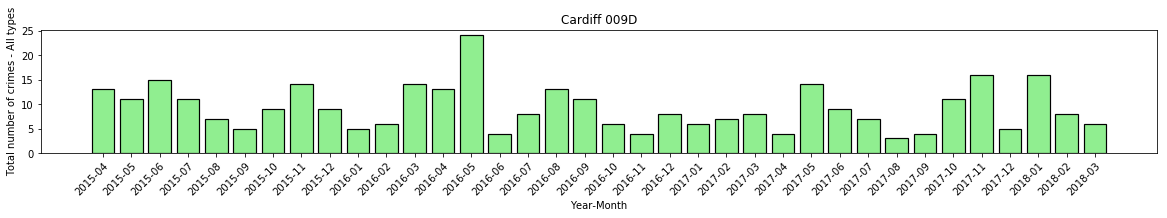

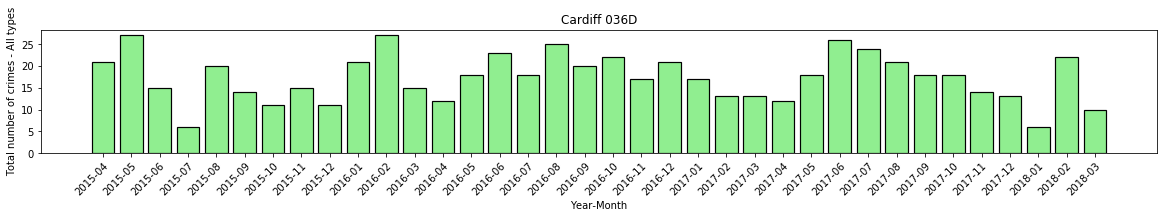

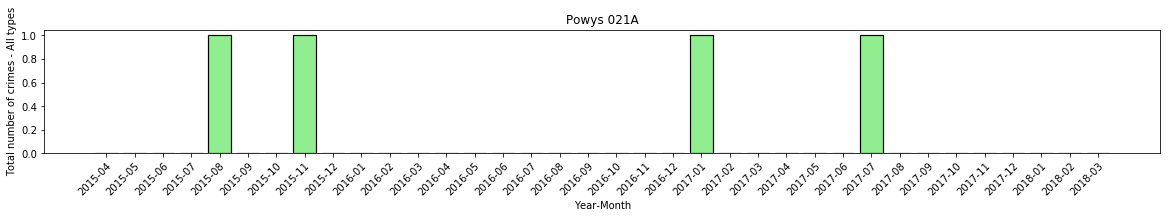

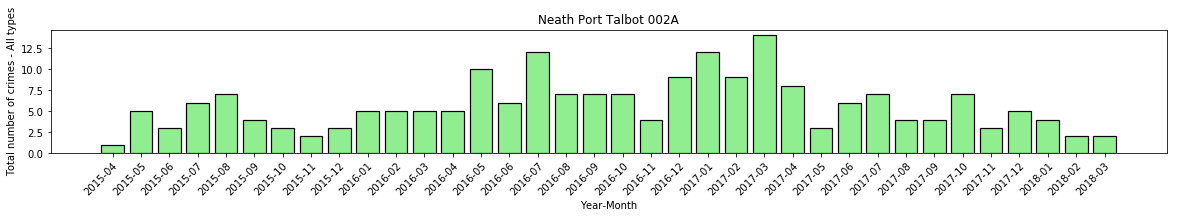

In [11]:
import matplotlib.pyplot as plt
import random


list_lsoa = list(df_freqtable['LSOA name'].unique())
# Plot only 4 random LSOA
sublist_lsoa = random.sample(list_lsoa, 4)

index = 0
for lsoa in sublist_lsoa:
    plt.figure(figsize=(20,5))

    plt.subplot(2, 1, index+1)
    axes = plt.gca()
    #axes.set_ylim([0,70])
    
    df_lsoa = df_freqtable.loc[(df_freqtable['LSOA name'] == lsoa)]
    
    x_labels = list(df_lsoa['Month'])
    data = df_lsoa['Crime Total'].values.tolist()

    plt.bar(range(len(data)), data, align="center", color='lightgreen',edgecolor='black', linewidth=1.2)
    plt.xticks(range(len(data)),x_labels, rotation=45, ha="right", rotation_mode="anchor")
    # Add title and axis names
    plt.title(lsoa)
    plt.xlabel('Year-Month')
    plt.ylabel('Total number of crimes - All types')

    plt.show()

# 3 Format the data ready for training

## 3.1 Reformat the continuous variables

In [12]:
# Keep only 3 types of crimes for now for simplicity
df_freqtable = df_freqtable[['LSOA name','Month','Anti-social behaviour','Robbery','Violence and sexual offences']]

df_freqtable.head(5)

Crime type,LSOA name,Month,Anti-social behaviour,Robbery,Violence and sexual offences
29300,Aylesbury Vale 018D,2015-04,0,0,0
29290,Aylesbury Vale 018D,2015-05,0,0,0
29312,Aylesbury Vale 018D,2015-06,0,0,0
29299,Aylesbury Vale 018D,2015-07,0,0,0
29313,Aylesbury Vale 018D,2015-08,0,0,0


## 3.2 Read in the population data

In [13]:
import pandas as pd

df_class = pd.read_csv('C:/Users/Lanthao/Desktop/GAN/data/RUC_OA_2001_EW_LU.csv')[['LSOA01NM','RUC01CD']]
df_class.sample(5)

C:\Users\Lanthao\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LSOA01NM,RUC01CD
57470,Leeds 087C,5
133959,Sevenoaks 010D,5
42574,Newcastle upon Tyne 028B,5
30556,Tameside 020C,5
12220,Hillingdon 017C,5


In [14]:
#df_class[df_class.duplicated(keep=False)]
print(len(df_class))
df_class = df_class.drop_duplicates(subset=['LSOA01NM', 'RUC01CD'], keep='first')
print(len(df_class))

175434
41174


In [15]:
df_class.ix[df_class['RUC01CD'] >= 5, 'RUC01CD'] = 1
df_class.ix[df_class['RUC01CD'] < 5, 'RUC01CD'] = 0
df_class.sample(5)

C:\Users\Lanthao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,LSOA01NM,RUC01CD
111919,South Hams 004C,0
31281,Trafford 018E,0
113778,West Dorset 012A,0
81465,Medway 024A,0
104918,Carrick 008B,0


## 3.3 Keep only the lsoa that belong to police data and population data

In [16]:
lsoa_police = df_freqtable['LSOA name'].unique()
print(len(lsoa_police))

lsoa_population = df_class['LSOA01NM'].unique()
print(len(lsoa_population))

# Intersect the 2 lists together to keep lsoas that are in both lists
lsoas = [value for value in lsoa_police if value in lsoa_population]
print(len(lsoas))

1056
34378
839


To simplify, we resample the number of months to be like in the example codes. Take only 12 months

In [17]:
import numpy as np

X = {}
y = {}

for lsoa in lsoas:
    tmp = df_freqtable[df_freqtable['LSOA name'] == lsoa].drop(['LSOA name','Month'], 1).T
    x_ex = tmp.as_matrix(columns=None) # array of arrays for one given lsoa 
    # here, we take only the first 12 months of data to be like in the example. Otherwise, comment out the line below
    x_ex = x_ex[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
    X[lsoa] = x_ex
    # Create categorical variables
    y[lsoa] = df_class.loc[df_class['LSOA01NM'] == lsoa]['RUC01CD']
    
print(X['Swansea 020A'][0])

[2 3 2 2 3 4 2 0 1 0 1 0]


In [18]:
print(len(X))
print(len(y))

839
839


In [19]:
import pickle as pkl
pkl.dump(X, open('./X_bp.pkl', 'wb'))
pkl.dump(y, open('./y_bp.pkl', 'wb'))

In [21]:
import pickle as pkl

X_array = np.array([])
y_array = np.array([])

for key, value in sorted(X.items()):
    if X_array.shape[0] == 0:
        X_array = np.array([value[:, :12]])
        y_array = y[key]
    else:
        X_array = np.concatenate((X_array, [value[:, :12]]))
        y_array = np.concatenate((y_array, y[key]))
    #print('key=%s: y_array=%s'%(key,y_array))
        
print(len(X_array))
print(len(y_array))
y_array = y_array[:839]
print(len(y_array))

839
999
839


## 3.4 Save the preprocessed data ready for training

In [22]:
pkl.dump(X_array, open('./output/X_processed.pkl', 'wb'))
pkl.dump(y_array, open('./output/y_processed.pkl', 'wb'))

In [23]:
print(len(X_array))
print(len(y_array))

839
839
